In [1]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
from roboflow import Roboflow

In [2]:
image_path = "./code/dev/012.jpg"

In [3]:
rf = Roboflow(api_key="") # need api key
project = rf.workspace().project("femoral_head_segmentation")
model = project.version(1).model

prediction = model.predict(image_path).json()

loading Roboflow workspace...
loading Roboflow project...


In [4]:
prediction

{'predictions': [{'x': 419.5,
   'y': 338.0,
   'width': 209.0,
   'height': 214.0,
   'confidence': 0.8413022756576538,
   'class': 'femoral circle',
   'points': [{'x': 441.79999999999995, 'y': 443.66534495053},
    {'x': 375.59687499999995, 'y': 417.2782078026762},
    {'x': 314.9771096419525, 'y': 364.1171875},
    {'x': 314.6928222447969, 'y': 271.4328125},
    {'x': 368.97656249999994, 'y': 231.65444196537044},
    {'x': 461.6609375, 'y': 230.97263830374305},
    {'x': 514.6881896368927, 'y': 284.67343750000003},
    {'x': 522.039608459316, 'y': 350.87656250000003},
    {'x': 514.7210138491951, 'y': 390.5984375},
    {'x': 441.79999999999995, 'y': 443.66534495053}],
   'image_path': './code/dev/012.jpg',
   'prediction_type': 'InstanceSegmentationModel'},
  {'x': 1204.0,
   'y': 359.0,
   'width': 208.0,
   'height': 206.0,
   'confidence': 0.8162791728973389,
   'class': 'femoral circle',
   'points': [{'x': 1229.6171875, 'y': 443.8116526661021},
    {'x': 1136.9328125, 'y': 443

In [5]:
image = cv2.imread(image_path)

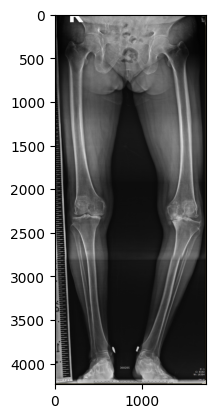

In [6]:
plt.imshow(image)

In [7]:
def define_circle(p1, p2, p3):
    """
    Returns the center and radius of the circle passing the given 3 points.
    In case the 3 points form a line, returns (None, infinity).
    """
    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])
    
    if abs(det) < 1.0e-6:
        return (None, np.inf)
    
    # Center of circle
    cx = (bc*(p2[1] - p3[1]) - cd*(p1[1] - p2[1])) / det
    cy = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det
    
    radius = np.sqrt((cx - p1[0])**2 + (cy - p1[1])**2)
    return ((cx, cy), radius)

In [8]:
def getPoints(prediction_json):
    left = prediction_json[0]
    right = prediction_json[1]
    if(prediction_json[0]['x'] > prediction_json[1]['x']):
        left = prediction_json[1]
        right = prediction_json[0]
    return left['points'], right['points']

In [9]:
left_points, right_points = getPoints(prediction["predictions"])

In [10]:
def get_three_points(points):
    points = points[:-1]
    p1 = points[(len(points) // 2) - 2]
    p2 = points[len(points) // 2]
    p3 = points[(len(points) // 2) + 2]
    return p1, p2, p3

In [11]:
lp1, lp2, lp3 = get_three_points(left_points)
rp1, rp2, rp3 = get_three_points(right_points)

In [12]:
lp1 = [lp1['x'], lp1['y']]
lp2 = [lp2['x'], lp2['y']]
lp3 = [lp3['x'], lp3['y']]

rp1 = [rp1['x'], rp1['y']]
rp2 = [rp2['x'], rp2['y']]
rp3 = [rp3['x'], rp3['y']]

In [13]:
left_circle = define_circle(lp1, lp2, lp3)

right_circle = define_circle(rp1, rp2, rp3)

In [14]:
left_center, left_radius = left_circle

right_center, right_radius = right_circle

In [15]:
left_center = (int(left_center[0]), int(left_center[1]))

right_center = (int(right_center[0]), int(right_center[1]))

In [16]:
print(left_center)
print(right_center)

(416, 328)
(1201, 357)


In [17]:
left_radius = int(left_radius)

right_radius = int(right_radius)

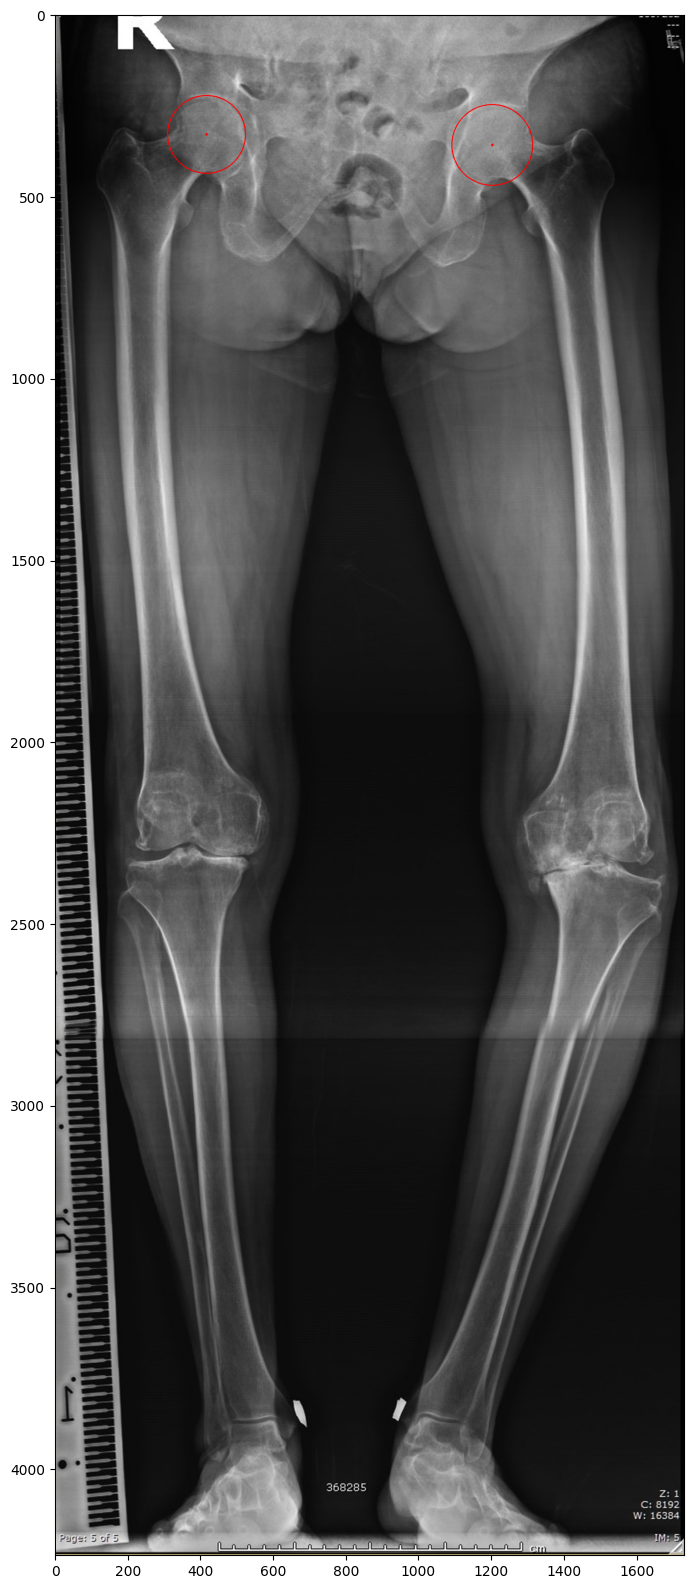

In [18]:
cv2.circle(image,(left_center[0],left_center[1]),left_radius,(255,0,0),2)
cv2.circle(image,(left_center[0],left_center[1]),2,(255,0,0),3)

cv2.circle(image,(right_center[0],right_center[1]),right_radius,(255,0,0),2)
cv2.circle(image,(right_center[0],right_center[1]),2,(255,0,0),3)

plt.figure(figsize=(20,20))
plt.imshow(image)